1. Sample Data

In [1]:
import pandas as pd
import numpy as np
from faker import Faker
from scipy.stats import norm, sem
import matplotlib.pyplot as plt
import plotly_express as px


In [2]:
# Initialize Faker and set seed for reproducibility
fake = Faker()
seed_value = 30
Faker.seed(seed_value)
np.random.seed(seed_value)

# Parameters for data generation
num_records = 300  # Number of records to generate

# Sample categories for categorical data
locations = ["Jakarta", "Surabaya", "Bandung", "Medan", "Denpasar", "Bekasi", "Tangerang", "Semarang", "Makassar"]
phone_brands = ["Samsung", "iPhone", "Xiaomi", "Oppo", "Vivo", "Realme"]
digital_interests = ["Social Media", "E-commerce", "Gaming", "Streaming", "Education"]
location_types = ["Urban", "Rural"]

# Generate names
names = [fake.name() for _ in range(num_records)]

# Function to generate Indonesian phone numbers
def generate_indonesian_phone_number():
    return f"+62 {np.random.randint(812, 899)}-{np.random.randint(1000, 9999)}-{np.random.randint(1000, 9999)}"

# Generate data
data = {
    "Nama Lokasi": np.random.choice(locations, num_records),
    "Jam Login": [fake.time(pattern="%H:%M") for _ in range(num_records)],
    "Nama": names,
    "Email": [f"{name.split()[0].lower()}{name.split()[1].lower()}@example.com" for name in names],
    "No Telp": [generate_indonesian_phone_number() for _ in range(num_records)],
    "Tahun Lahir": np.random.randint(1970, 2005, num_records),
    "Merk HP": np.random.choice(phone_brands, num_records),
    "Digital Interest": np.random.choice(digital_interests, num_records),
    "Location Type": np.random.choice(location_types, num_records)
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows
display(df.head())


,Nama Lokasi,Jam Login,Nama,Email,No Telp,Tahun Lahir,Merk HP,Digital Interest,Location Type
0,Bekasi,08:34,Donna Johnson,donnajohnson@example.com,+62 823-5619-3357,1995,iPhone,Gaming,Rural
1,Bekasi,07:53,Christine Scott,christinescott@example.com,+62 831-3007-8537,1977,Vivo,Gaming,Urban
2,Denpasar,00:54,Martin Zhang,martinzhang@example.com,+62 830-3935-5652,1978,Samsung,Social Media,Urban
3,Semarang,23:15,Wyatt Riddle,wyattriddle@example.com,+62 871-7119-9166,1971,Oppo,Education,Rural
4,Bandung,15:46,Benjamin Moore,benjaminmoore@example.com,+62 875-9642-2577,1974,Samsung,Gaming,Rural


2. Kembangkan variable diatas menjadi beberapa variabel baru

In [3]:
# Add new variable: Age
current_year = 2024
df['Usia'] = current_year - df['Tahun Lahir']

# Add new variable: Login Period
def login_period(time):
    hour = int(time.split(":")[0])
    if 4 <= hour < 11:
        return "Pagi"
    elif 11 <= hour < 15:
        return "Siang"
    elif 15 <= hour < 18:
        return "Sore"
    else:
        return "Malam"
df['Login Period'] = df['Jam Login'].apply(login_period)

# Add new variable: Phone Brand Category
def phone_brand(brand):
    if brand in ["Samsung", "Xiaomi", "Oppo", "Vivo", "Realme"]:
        return "Android"
    else:
        return "iOS"

df['Phone Brand Category'] = df['Merk HP'].apply(phone_brand)



In [4]:
df

,Nama Lokasi,Jam Login,Nama,Email,No Telp,Tahun Lahir,Merk HP,Digital Interest,Location Type,Usia,Login Period,Phone Brand Category
0,Bekasi,08:34,Donna Johnson,donnajohnson@example.com,+62 823-5619-3357,1995,iPhone,Gaming,Rural,29,Pagi,iOS
1,Bekasi,07:53,Christine Scott,christinescott@example.com,+62 831-3007-8537,1977,Vivo,Gaming,Urban,47,Pagi,Android
2,Denpasar,00:54,Martin Zhang,martinzhang@example.com,+62 830-3935-5652,1978,Samsung,Social Media,Urban,46,Malam,Android
3,Semarang,23:15,Wyatt Riddle,wyattriddle@example.com,+62 871-7119-9166,1971,Oppo,Education,Rural,53,Malam,Android
4,Bandung,15:46,Benjamin Moore,benjaminmoore@example.com,+62 875-9642-2577,1974,Samsung,Gaming,Rural,50,Sore,Android
...,...,...,...,...,...,...,...,...,...,...,...,...
295,Makassar,00:11,Mrs. Morgan Johnson,mrs.morgan@example.com,+62 850-7057-6927,1996,Realme,Streaming,Rural,28,Malam,Android
296,Makassar,08:51,Stephen Rosario,stephenrosario@example.com,+62 893-1183-3778,2004,Vivo,E-commerce,Urban,20,Pagi,Android
297,Jakarta,20:43,Kim Clarke,kimclarke@example.com,+62 896-8826-8921,2001,Samsung,Social Media,Rural,23,Malam,Android
298,Medan,00:24,Emily Salazar,emilysalazar@example.com,+62 871-1010-8716,1982,Xiaomi,Streaming,Urban,42,Malam,Android


3. Membuat System Confidence Interval

In [24]:
# Confidence Level
confidence_level = 0.95
z_value = norm.ppf((1 + confidence_level) / 2)  # Z-score for 95% confidence

### 1. Confidence Interval for Average Age ###
current_year = 2024
df['Usia'] = current_year - df['Tahun Lahir']

mean_age = df['Usia'].mean()
std_error_age = sem(df['Usia'])  # Standard error

# Confidence Interval
lower_age = mean_age - z_value * std_error_age
upper_age = mean_age + z_value * std_error_age

print(f"95% Confidence Interval for Average Age: ({lower_age:.2f}, {upper_age:.2f})")

### 2. Confidence Interval for 'E-commerce' Proportion ###
category = 'Malam'
count_category = (df['Login Period'] == category).sum()
total_records = len(df)

# Proportion and Standard Error
p_hat = count_category / total_records
std_error_prop = np.sqrt((p_hat * (1 - p_hat)) / total_records)

# Confidence Interval
lower_prop = p_hat - z_value * std_error_prop
upper_prop = p_hat + z_value * std_error_prop

print(f"95% Confidence Interval for '{category}' Proportion: ({lower_prop:.4f}, {upper_prop:.4f})")


95% Confidence Interval for Average Age: (35.77, 37.99)
95% Confidence Interval for 'Malam' Proportion: (0.3641, 0.4759)


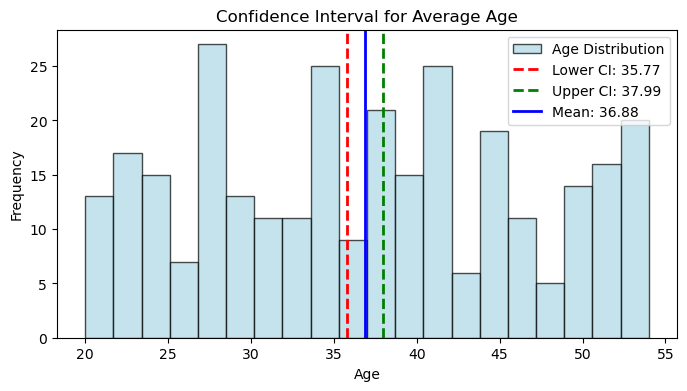

In [6]:
# Visualize Confidence Interval for Age
plt.figure(figsize=(8, 4))
plt.hist(df['Usia'], bins=20, color='lightblue', edgecolor='black', alpha=0.7, label="Age Distribution")
plt.axvline(lower_age, color='red', linestyle='dashed', linewidth=2, label=f"Lower CI: {lower_age:.2f}")
plt.axvline(upper_age, color='green', linestyle='dashed', linewidth=2, label=f"Upper CI: {upper_age:.2f}")
plt.axvline(mean_age, color='blue', linestyle='solid', linewidth=2, label=f"Mean: {mean_age:.2f}")
plt.title("Confidence Interval for Average Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()


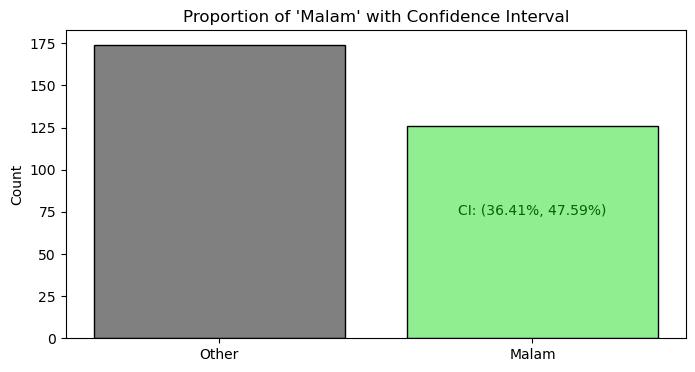

In [25]:
# Visualize Confidence Interval for Category Proportion
plt.figure(figsize=(8, 4))
categories = ['Other', 'Malam']
counts = [total_records - count_category, count_category]

plt.bar(categories, counts, color=['gray', 'lightgreen'], edgecolor='black')
plt.title(f"Proportion of '{category}' with Confidence Interval")
plt.ylabel("Count")
plt.annotate(f"CI: ({lower_prop:.2%}, {upper_prop:.2%})",
             xy=(1, count_category/2),
             xytext=(1, count_category/2 + 10),
             ha='center', fontsize=10, color='darkgreen')

plt.show()

4. Exploratory Data Analysis

In [8]:
# grouping by login period and counting the name
toplogin = df.groupby("Login Period")["Nama"].count().sort_values(ascending=False)
toplogin = toplogin.reset_index()

# pie chart figure
fig = px.pie(toplogin, names="Login Period", 
              values="Nama", 
              title="Persentase Periode Login",
              hover_data=["Nama"]) 

#display pie chart and grouping data
fig.show()

In [ ]:
# grouping by digital interest and counting the name
topdigin = df.groupby("Digital Interest")["Nama"].count().sort_values(ascending=False)
topdigin = topdigin.reset_index()

# pie chart figure
fig = px.pie(topdigin, names="Digital Interest", 
              values="Nama", 
              title="Persentase Interest Digital",
              hover_data=["Nama"]) 

#display pie chart and grouping data
fig.show()

In [23]:
# grouping data by usia and counting nama
topage = df.groupby("Usia")["Nama"].count().sort_values(ascending=False)
topage = topage.reset_index()

# bar chart figure
fig = px.bar(topage, x="Usia", y="Nama", orientation='v', text_auto=True, title="Persebaran Usia Pengguna")
fig.update_layout(xaxis_title='Usia', yaxis_title='Jumlah Pengguna')

# display
fig.show()

In [12]:
# grouping by phone brand category and counting the name
topbrand = df.groupby("Phone Brand Category")["Nama"].count().sort_values(ascending=False)
topbrand = topbrand.reset_index()

# pie chart figure
fig = px.pie(topbrand, names="Phone Brand Category", 
              values="Nama", 
              title="Persentase Kategori Ponsel",
              hover_data=["Nama"]) 

#display pie chart and grouping data
fig.show()

In [22]:
# grouping data by lokasi and counting nama
toploc = df.groupby("Nama Lokasi")["Nama"].count().sort_values(ascending=False)
toploc = toploc.reset_index()

# bar chart figure
fig = px.bar(toploc, x="Nama Lokasi", y="Nama", orientation='v', text_auto=True, title="Persebaran Kota Pengguna")
fig.update_layout(xaxis_title='Lokasi', yaxis_title='Jumlah Pengguna')

# display
fig.show()

In [19]:
df.to_excel("/Users/vincartheoseta/Downloads/sampledata_vincar.xlsx")